<a href="https://colab.research.google.com/github/igolynker/NGG605/blob/main/HW_20230927_IG_Parametric_Correlation_Coefficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definitions

Correlation is a measure of association between measured (random) variables. The Pearson's correlation coefficient quantifies the strength of this association on a simple scale: it varies between -1 and 1. The larger the absolute value of this correlation coefficient, the tighter the correlation and more predictive it is. The smaller the absolute value, the weaker the correlation and less predictive. Positive values imply a positive correlation: as I eat more ice cream, my weight goes up. Negative values imply a negative correlation: as I eat more ice cream, my weight goes down (wouldn't that be great!).

The Pearson's correlation coefficient is called parametric because it assumes a parametric form of the distributions of the two random variables, $X$ and $Y$; specifically, that both variables are [normally distributed](https://colab.research.google.com/drive/1-KxH3FCq5rDyyO33HXxewIv-kKldkINi?usp=sharing).

# Computing for a population

When you have full knowledge of the joint distribution of $𝑋$ and $Y$ (e.g., when working with an idealized model, not with real, finite data sets), the Pearson's correlation coefficient is typically denoted as $\rho$ and computed in terms of the covariance between the two variables, normalized by the product of their individual standard deviations:

$\quad\rho_{X,Y}=\frac{cov(X,Y)}{\sigma_x\sigma_y}$

where

$\quad cov(X,Y)=E\left [ (X-\mu_X)(Y-\mu_Y)\right ]$

in which $\mu_X$ and $\mu_Y$ are the means of $X$ and $Y$, respectively, and $E\left[\right]$ denotes expected value.

# Computing for a sample

When working with real data, you have a [sample, not a population](https://colab.research.google.com/drive/1SnVM1MPaFvMSjlDLyihgeZ25OAk-k4Nk?usp=sharing), and thus need to compute the correlation coefficient (typically denoted as *r*) using sample statistics.

## Sample Pearson's correlation coefficient

$\quad r_{X,Y}=\frac{\sum^n_{i-1}{(x_i-\bar{x})(y_i-\bar{y})}}{\sqrt{\sum^n_{i-1}{(x_i-\bar{x})^2}}\sqrt{\sum^n_{i-1}{(y_i-\bar{y})^2}}}$

where

$\quad \bar{x}=\frac{1}{n}\sum^n_{i=1}{x_i,\bar{y}}=\frac{1}{n}\sum^n_{i=1}{y_i}$

are the sample means.

## Coefficient of determination

It is possible to compute $r_{X,Y}$ not just when $X$ and $Y$ are two random variables, but also when one is a random (dependent) variable (typically $Y$) and the other is an independent or explanatory variable (typically $X$). In this case, the square of the correlation coefficient ($r^2$) quantifies the total variation in one variable ($Y$) that is explained by the regression line with respect to the other variable ($X$). This quantity is called the **coefficient of determination** and is often referred to as the fraction of explained variance

## Standard error of the sample Pearson's correlation coefficient

The standard error of the sample *r* is computed by assuming that r follows a [Student's t distribution](https://colab.research.google.com/drive/1Q_Du5NK71Rc1qu-byh8dy8Fs39uvR_4n?usp=sharing) with two degrees of freedom (because of the two variables):

$\quad s_r=\sqrt{\frac{1-r^2}{n-2}}$

Note that "standard error" refers in general to the standard deviation of a statistical estimate, which here is *r*. It is not the same thing as the "standard error of the mean", which refers to the standard deviation of a statistical estimate of a mean.

## Confidence intervals for the sample Pearson's correlation coefficient

This is a bit tricker to compute, because r is not normally distributed, particularly around the extreme values (e.g., around 1, the distribution cannot go higher than one but can take many values <1). We therefore need to do the following (a good explanation is [here](http://faculty.washington.edu/gloftus/P317-318/Useful_Information/r_to_z/PearsonrCIs.pdf)):

1\. Take the Fisher's z-transformation of r:

$\quad z=0.5\times ln(\frac{1+r}{1-r})$

2\. Compute its standard deviation as:

$\quad s_z=\sqrt{\frac{1}{n-3}}$

3\. Compute confidence intervals in this z-space as we have shown [here](https://colab.research.google.com/drive/1rdJMusMZDTaM9OGsyt27tCVkSasmRj2O?usp=sharing), as:

$\quad z \pm (z\:criterion) \times s_z$

where the *z* criterion is determined from the desired confidence value using a [z-score calculator](http://www.z-table.com) or [norminv](https://www.mathworks.com/help/stats/norminv.html) in Matlab.

4\. Then translate each *z* value back to *r* as:

$\quad r=\frac{e^{2z}-1}{e^{2z}+1}$


## Hypothesis testing on the sample Pearson's correlation coefficient

For $H_0: r=0$. Here we are considering a null distribution that is centered at *r*=0. In this case, we know that the distribution of *r* around that mean is symmetric, and the sample mean follows follows a [Student's *t* distribution](https://colab.research.google.com/drive/1Q_Du5NK71Rc1qu-byh8dy8Fs39uvR_4n?usp=sharing).  Therefore, our test statistic is simply the *t* statistic, which we compute as the residual (with respect to zero) of *r* divided by its standard error:

$\quad t=\frac{r}{s_r}$

with $n-2$ degrees of freedom.

For $H_0: r=r_s,\:where\:r_s\ne 0$. Here we are considering null distributions that are not centered at $r=0$ and therefore are not symmetric and do not follow a *t* distribution. We therefore first compute the *z* transformation of $r$ and $r_s$, as above. Now our test statistic is:

$\quad \lambda =\frac{z_r-z_{rs}}{\sqrt{\frac{1}{n-3}}}$

with $n-2$ degrees of freedom.



# Exercises

Let's examine the relationship between these two measured variables:

Wing length | Tail length
--- | ---
10.4 | 7.4
10.8 | 7.6
11.1 | 7.9
10.2 | 7.2
10.3 | 7.4
10.2 | 7.1
10.7 | 7.4
10.5 | 7.2
10.8 | 7.8
11.2 | 7.7
10.6 | 7.8
11.4 | 8.3

Assume Wing length is the $X$ variable and Tail Length is the $Y$ variable, both measured in cm.

Answers to the questions below will be found [here](https://github.com/PennNGG/Quantitative-Neuroscience/tree/master/Answers%20to%20Exercises/Python) after the due date.

##### 1\. Plot X vs Y. Do they look related?

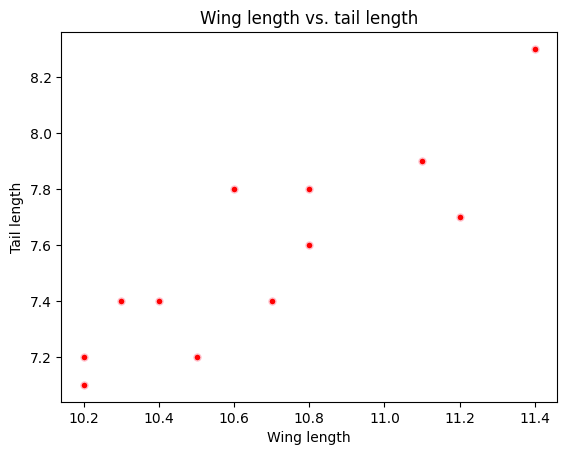

dots somewhat look related linearly


In [3]:
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import math as math

#1. Let's examine the relationship between these two measured variables:
x = [10.4,10.8,11.1, 10.2, 10.3, 10.2,10.7, 10.5, 10.8, 11.2, 10.6, 11.4]  #Wing legth
y = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2 ,7.8 ,7.7, 7.8, 8.3] #Tail length

# plotting the points
plt.plot(x, y, color='pink', linewidth = False, marker='.', markerfacecolor='red', markersize=10)
plt.xlabel('Wing length')
plt.ylabel('Tail length')

# giving a title to my graph
plt.title('Wing length vs. tail length')

# function to show the plot
plt.show()

print("dots somewhat look related linearly")


##### 2\. Calculate $r_{X,Y}$ and $r_{Y,X}$, first using the equations above and then using either the Python numpy funciton [corrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) or Matlab's built-in [corrcoef](https://www.mathworks.com/help/matlab/ref/corrcoef.html). Did you get the same answers?

In [2]:

#2. 2. Calculate  𝑟𝑋,𝑌  and  𝑟𝑌,𝑋 , first using the equations above and then using either the Python numpy funciton corrcoef or Matlab's built-in corrcoef. Did you get the same answers?
#calculate the means for x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

#a. Calculate the sum of products of deviations from the means x and y (for loop)-> this would be the numerator
sum_product_dev = 0
for i in range(len(x)):
    sum_product_dev += (x[i] - mean_x) * (y[i] - mean_y)
#print(sum_product_dev)

#b. Calculate the product of both standard deviations (root of the sum of the deviations from the mean for x and y)
std_dev_x = 0
for k in range(len(x)):
    std_dev_x += (x[k] - mean_x) ** 2
root_std_dev_x = std_dev_x**0.5

std_dev_y = 0
for j in range(len(y)):
    std_dev_y += (y[j] - mean_y) ** 2
root_std_dev_y = std_dev_y**0.5
#print(root_std_dev_y)

product_std_x_y = root_std_dev_x*root_std_dev_y
#print(product_std_x_y)
# divide a by b
pearson_manual = sum_product_dev/product_std_x_y
print(pearson_manual)

#Pearson function
correlation_matrix = np.corrcoef(x, y)
#print(correlation_matrix)

# print out only the second value of the first row of the matrix (the first is just 1)
pearson_function = correlation_matrix[0, 1]
print(pearson_function)

print("Pearson Correlation Coefficient using manual funbction: ", pearson_manual)
print("Pearson Correlation Coefficient Using Corrcoef():", pearson_function)
print("Did you get the same answers? ", pearson_manual == pearson_function)

0.8703545613058227
0.8703545613058227
Pearson Correlation Coefficient using manual funbction:  0.8703545613058227
Pearson Correlation Coefficient Using Corrcoef(): 0.8703545613058227
Did you get the same answers?  True


##### 3\. What is the standard error of $r_{X,Y}$? The 95% confidence intervals computed from the standard error?

In [5]:
from scipy.stats import norm
# "The standard error of the sample r is computed by assuming that r follows a Student's t distribution with two degrees of freedom (because of the two variables):"
r = pearson_function
n = len(x) #number of data points
S_r = np.sqrt((1-r**2)/(n-2)) #standard error of "r" using the formula given
print("Standard deviation of the correlation coefficient: ", S_r)

#Compute the confidence intervala from standard error
#1.Take the Fisher's z-transformation of r:
nat_log_r = math.log((1+r)/(1-r))
z = 0.5 * nat_log_r
#2. Compute its standard deviation as:
S_z = np.sqrt(1/(n-3))
#3. Compute confidence intervals in this z-space
z_criterion = norm.ppf(0.95) #z score for a specific CI = 0.95. Had to import from scipy.stats import norm
CI_lower = z - (z_criterion)* S_z
CI_higher = z + (z_criterion) * S_z

#4. Then translate each z value back to r as:
r_transformed = (np.exp(2 * z) - 1) / (np.exp(2 * z) + 1)

print("The 95% CI is: [", CI_lower, ", ", CI_higher, "]")


Standard deviation of the correlation coefficient:  0.15571863652567375
The 95% CI is: [ 0.7862554412699767 ,  1.8828245259042915 ]


##### 4\. Should the value of $r_{X,Y}$ be considered significant at the *p*<0.05 level, given a two-tailed test (i.e., we reject if the test statistic is too large on either tail of the null distribution) for $H_0: r_{X,Y}=0$?

In [6]:
#double-checked ChatGPT how to use an r value (Person's correlation coefficient) and s S_r (standard error of the coefficient) to calculate the t-score
# Calculate the Test Statistic (t-score):
#Use the formula for the t-score:t = 𝑟 / 𝑠𝑟
t = r / S_r
print(t)
print("Since the null hypothesis is that r = 0, and here r is ", t, "or not r = 0, we can reject the null hypothesis and call the result significant")


5.589276792584329
Since the null hypothesis is that r = 0, and here r is  5.589276792584329 or not r = 0, we can reject the null hypothesis and call the result significant


##### 5\. Yale does the exact same study and finds that his correlation value is 0.75. Is this the same as yours? That is, evaluate $𝐻_0: r=0.75$.

In [8]:
#5. Yale does the exact same study and finds that his correlation value is 0.75. Is this the same as yours? That is, evaluate
#Recalculate  S_r (standard error) and t-score with r = 0.75
#From HW guide: "For  𝐻0:𝑟=𝑟𝑠,𝑤ℎ𝑒𝑟𝑒𝑟𝑠≠0 . Here we are considering null distributions that are not centered at  𝑟=0  and therefore are not symmetric and do not follow a t distribution. We therefore first compute the z transformation of  𝑟  and  𝑟𝑠 , as above. Now our test statistic is:
#using r as the initial r I calculated and Rs and r_yale (the second score I will calculate)
r_Yale = 0.75
n = len(x) #number of data points
S_r_Yale = np.sqrt((1-r**2)/(n-2)) #standard error of "r" using the formula given
print("Standard deviation of the correlation coefficient: ", S_r_Yale)
#Compute the confidence intervala from standard error
#1.Take the Fisher's z-transformation of r:
nat_log_r_Yale = math.log((1+r_Yale)/(1-r_Yale))
z_Yale = 0.5 * nat_log_r_Yale

#Insert lambda test  as the last step (from HW guide)
lambda_test = (z - z_Yale)/(np.sqrt(1/(n-3)))
print("t-score: ", lambda_test)
print("Yale's r=0.75 yileded a non-zero t-score (", lambda_test, "), hence, we can reject the null hypothesis in this case as well")


Standard deviation of the correlation coefficient:  0.15571863652567375
t-score:  1.0847547271784326
Yale's r=0.75 yileded a non-zero t-score ( 1.0847547271784326 ), hence, we can reject the null hypothesis in this case as well


##### 6\. Finally, calculate the statistical power and sample size needed to reject $H_0:r=0\:when\:r\ge 0.5$.

In [9]:
#6. Finally, calculate the statistical power and sample size needed to reject  𝐻0:𝑟=0 𝑤ℎ𝑒𝑛 𝑟≥0.5 ..
#Adapted from pervious HW assigment
from statsmodels.stats.power import TTestIndPower
effect_size = 0.5 # Desired effect size
alpha = 0.05  # Significance level
power = 0.80  # Desired power
power_analysis = TTestIndPower() #this is how you deal wih an instance method.
#sample_size = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1, alternative='two-sided') #for two-sided
sample_size = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1, alternative='larger') #for larger because looking for effect size >= 0.5
print(f"Required Sample Size: {sample_size:.2f}")

Required Sample Size: 50.15


# Additional Resources


- Differences between correlation and regression are discussed [here](https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression) and [here](http://www.biostathandbook.com/linearregression.html).

- A reference on [how to choose the appropriate measure of association](https://journals.sagepub.com/doi/pdf/10.1177/8756479308317006) (Khamis 2008).

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania